In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [4]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# The Ising model in 2D
The Hamiltonian of the Ising model is

$$
\mathcal{H} = -\sum_{\langle ij \rangle} J s_i s_j - H \sum_i s_i
$$

In this exercise, we focus on the case $J=1, H=0$, that is, a ferromagnetic system with no external field. Remember that the sum $\langle ij \rangle$ runs over neighbouring sites only. In our 2D lattice, each site has 4 neighbours. 

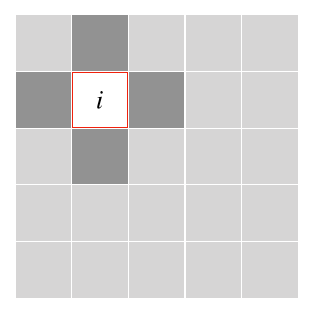 


We will work with **periodic boundary conditions**, so that all spins have 4 neighbours. 

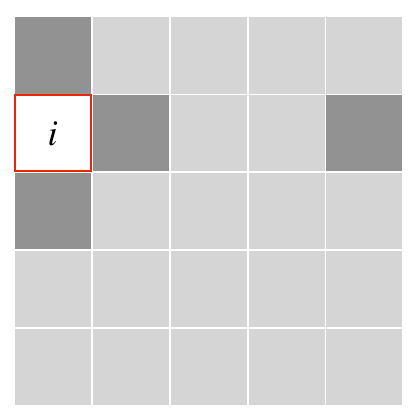 


# The Metropolis algorithm
We will build a simple implementation of the **Metropolis** algorithm for the 2D Ising model. 

As a reminder, a single update of the Metropolis algorithm works as follows:

1. Pick a site $(i, j)$ at random.
2. Calculate the energy change $\Delta E$ that flipping the spin $s_{ij}$ would produce.
3. If $\Delta E <0$, flip the spin with probability $1$.
4. If $\Delta E >0$, flip the spin with probability $e^{-\beta \Delta E}$.

### Exercice 4.1
Write a function that, given an integer $N$, returns an $N \times N$ array whose elements are randomly picked from {-1, 1}. 

In [3]:
_J=1

In [4]:
def create_initial_config(N=None):
    """
    Create the starting initial configuration.
    
    All elements are {-1, 1} with 50% prob.
    The lattice is a square of size N.
    
    Parameters
    ----------
    N : int
        The system size.

    Returns
    -------
    config : np.array, (N, N)
        A random {-1, 1} array of size (N, N).
    """
    config = np.random.choice([-1,1],size=(N,N))
    return config

Let us create an initail configuration with our `create_inital_config_function`. A system size of $N=100$ will be enough.

In [5]:
config = create_initial_config(N=100)

To plot our system we can use `plt.imshow()`, as follows:

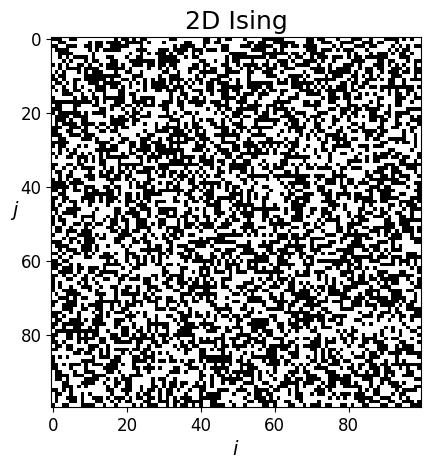

In [6]:
plt.imshow(config,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising')
plt.show()

### Exercise 4.2
We will write our Metropolis update function. Given a site $(i, j)$, what is the change in energy $\Delta E$ that flipping $S(i, j)$ entails?
Recall that only 4 spins are connected to $(i, j)$, so you don't need to compute the energy of the whole system.

### **Risposta**
$$\Delta E=2J\,S(i,j)\sum_{k\ n.n.\ to\ j}S(k,j)$$

### Exercise 4.3
Write a function called `metropolis_single_update()`.  
The **input** should be:

+ *config*, a lattice configuration as an (N, N) array.
+ *T*, the temperatue.

There is no need to return anything since in python, functions can modify its input, so we will be updating config *inplace*. But it is useful to return the energy change $\Delta E$ if one later wants to track the energy during simulations. To simplify things, we will use **periodic boundary conditions** (in python, the modulo operator is `%`).

In [7]:
def pbc(index,size):
    return (index%size)

In [8]:
def metropolis_single_update(config=None, T=None):
    '''
    Do a single Monte Carlo update using Metropolis algorithm.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The current configuration.
    T : float
        The temperature.

    '''
    # make sure config is square
    N, M = config.shape
    assert N==M, "Size's not (N,N)"
    
    # choose random site
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
    s =  config[i, j]
        
    # compute energy cost of flip
    # DeltaE is the possible energy cost
    # effDeltaE is the real energy cost (depending on whether we did the flip or not)
    DeltaE = 2*_J*s*(config[pbc(i-1,N),j]+config[pbc(i+1,N),j]+config[i,pbc(j-1,N)]+config[i,pbc(j+1,N)])
    effDeltaE = 0

    # case DeltaE < 0, flip the spin with prob 1 
    if DeltaE < 0:
        # flip the sping
        s *= -1
        # set effective DeltaE to DeltaE 
        effDeltaE = DeltaE
        
    # case DeltaE >= 0
    else:
        # flip the spin with certain probability
        if np.random.uniform()<=np.exp(-DeltaE/T):
            # flip the sping
            s *= -1
            # set effective Delta E 
            effDeltaE = DeltaE
        
    # update configuration
    # notice there is no need to return the whole configuration, the function
    # will modify config _in_place_
    config[i, j] = s
    
    # but it is clever to return the effective DeltaE, since we have already computed it
    # notice that if we didn't flip the spin, the change in energy is 0
    return effDeltaE

## Visualizing the simulation on real time
To see if our Metropolis algorithm works, you might want to simulate systems at different temperatures, and observe how the configuration evolves trought time. To do this you need the `display` module. Below you will find an example of how to use it.

For the 2D Ising model, the **critical temperature** is known to be
$$
T_c = \frac{2}{\ln(1+\sqrt{2})} \simeq 2.2691853...
$$
(with $k_B=1$). Try executing the cell below at different values of the temperature, for different system size. 

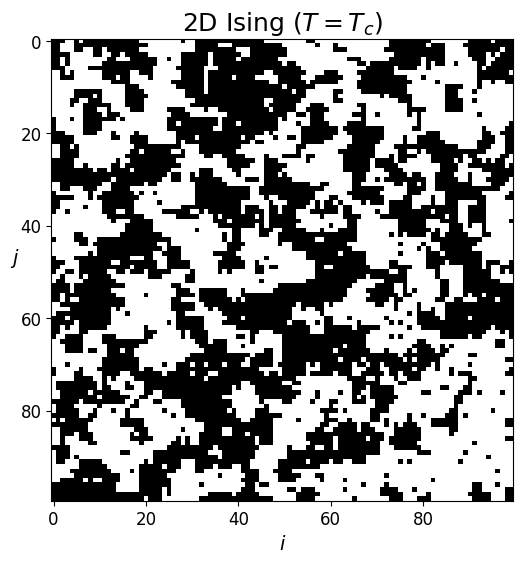

In [9]:
T_c = 2/np.log(1+np.sqrt(2))

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# draw the initial configuration,
# naming the plot "im".
im=plt.imshow(config,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising ($T=T_c$)')

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

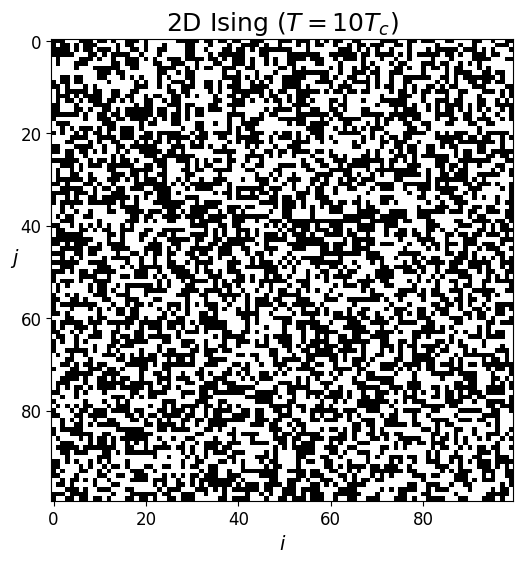

In [10]:
T_high = 10*T_c

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# draw the initial configuration,
# naming the plot "im".
im=plt.imshow(config,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising ($T=10T_c$)')

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_high)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

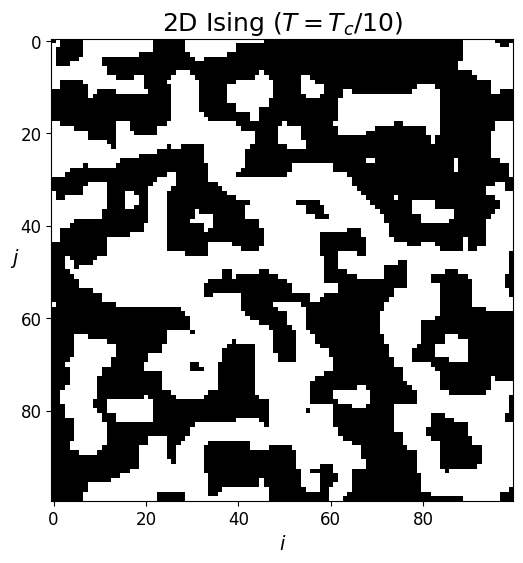

In [11]:
T_low = T_c/10

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# draw the initial configuration,
# naming the plot "im".
im=plt.imshow(config,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising ($T=T_c/10$)')

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_low)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Exercice 4.4
Write a function that computes the energy of a configuration, and another that tracks its evolution over time.

In [10]:
def get_energy(config):
    """
    Compute the energy of a configuration.
    
    The energy is defined as $E = -\sum_{(a, b)} S_a S_b$,    
    where the sum runs over pairs of adjacent spins.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The system configuration.
        
        
    Returns
    -------
    E : float
        The energy of the configuration.
    """
    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j, i, pbc(j+1,N))
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, pbc(i+1,N), j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= _J*config[i1,j1]*config[i2,j2]
    
    return E

In [11]:
def get_energy_evolution(N=20, T=T_c, n_updates=100000):
    """
    Compute the energy evolution of a 2D Ising instance.
    
    Parameters
    ----------
    N : int
        The system size.
    T : float
        The temperature.
    n_updates : int
        Number of Metropolis updates.
        
    Returns
    -------
    Es : np.array, (n_updates, )
    """
    Es=[]
    config = create_initial_config(N)
    for t in range(n_updates):
        Es.append(get_energy(config))
        metropolis_single_update(config,T)
    
    
    return Es

### Exercise 4.5
Compute the energy of your system during a long simulation, and plot it as a function of time. **Tip** Use logarithmic x-axis!

In [75]:
energy_evolution_low = get_energy_evolution(T=T_c/10)
energy_evolution_critic = get_energy_evolution(T=T_c)
energy_evolution_high = get_energy_evolution(T=T_c*10)

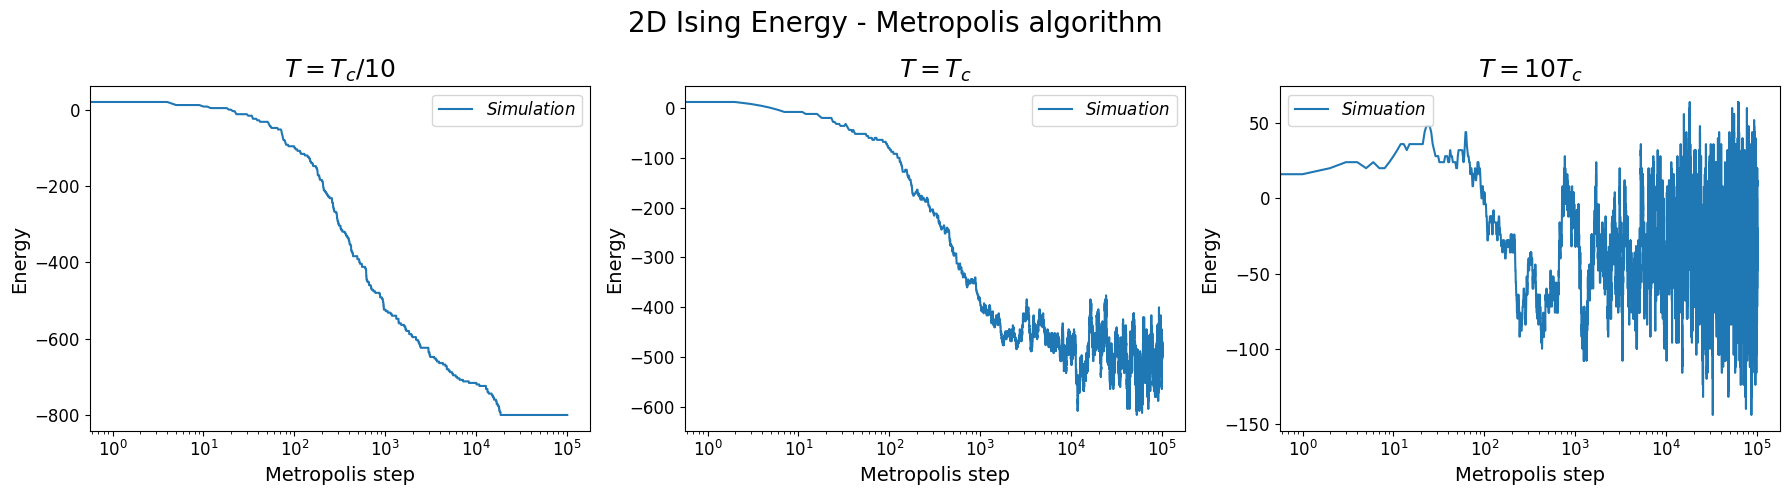

In [77]:
fig, [ax,ax1,ax2] = plt.subplots(1, 3, figsize=(18, 5))

ax.semilogx(energy_evolution_low, label=r'$Simulation$')
ax.set_xlabel(r'Metropolis step')
ax.set_ylabel(r'Energy')
ax.legend()
ax.set_title(r'$T=T_c/10$')

ax1.semilogx(energy_evolution_critic, label=r'$Simuation$')
ax1.set_xlabel(r'Metropolis step')
ax1.set_ylabel(r'Energy')
ax1.legend()
ax1.set_title(r'$T=T_c$')

ax2.semilogx(energy_evolution_high, label=r'$Simuation$')
ax2.set_xlabel(r'Metropolis step')
ax2.set_ylabel(r'Energy')
ax2.legend()
ax2.set_title(r'$T=10T_c$')

plt.suptitle(r'2D Ising Energy - Metropolis algorithm',fontsize=20)
plt.tight_layout()
plt.show()

### Exercise 4.6
Can you distinguish two qualitatively different periods? What do they correspond to?

### **Risposta**
Si distinguono due fasi: la prima in cui il sistema va allo stato di equilibrio, la seconda in cui il sistema oscilla attorno allo stato di equilibrio. Si può notare anche che più la temperatura è alta più le oscillazioni sono grandi poiché nell'algoritmo di Metropolis la probabilità di accettare una mossa aumenta all'aumentare della temperatura. 

# Efficient Metropolis
Our implementation of the Ising model was not very efficient. To do this exercice, we will use part of the code from Sethna's book, which is much more efficient and can be found here:

[Sethan's book computer exercices](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/Ising/Ising.html)

To import code from an external file, we need to add its directory to the PATH



In [52]:
import sys
sys.path.append("../code/")
from ising_sethna import IsingModel

Their implementation is based on a `Class`, which means we need to instantiate the model. For instance:

In [13]:
# create an instance of IsingModel
ising = IsingModel(N=100)

In [14]:
# the state of the system is stored in .lattice
ising.lattice

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

Text(0.5, 1.0, '2D Ising')

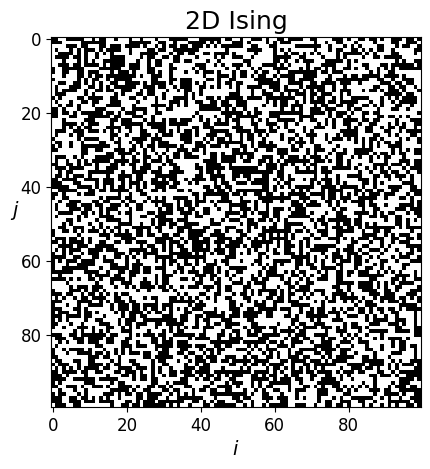

In [15]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.imshow(ising.lattice,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising')

Notice that this implementation uses 0, 1 spins instead of -1, 1 as we are used to! To run the simulation, we call the `.SweepMetropolis()` method. If you go to the source file at `SethnasBookCode/Ising.py`, you can inspect all the code. You will notice that all `.Sweep...()` methods perform $N^2$ updates per time-step. This is useful because time-scales become independent of system size.

In [16]:
ising.SweepMetropolis(nTimes=100)

Text(0.5, 1.0, '2D Ising')

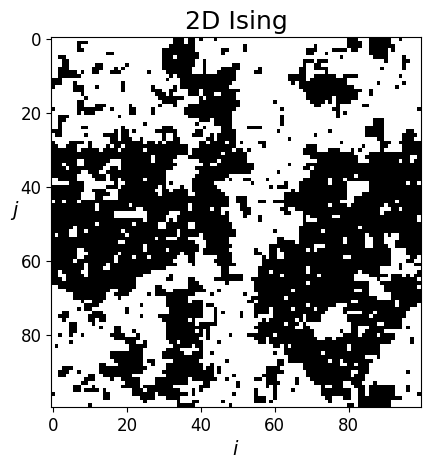

In [17]:
plt.imshow(ising.lattice,cmap='Greys')
plt.xlabel(r'$i$')
plt.ylabel(r'$j$',rotation=0)
plt.title(r'2D Ising')

The cell bellow will display 3 systems side-by-side, running at different temperatures. All parameters are set at the top. Try changing some values and see what happens.

In [20]:
#################
# set parameters
system_size = 100
H = 0.0
T_below = 1.5
T_critical = 2.269185314213022
T_above = 3.5
n_sweeps = 100
###############

# create three instances of IsingModel
ising_below = IsingModel(N=system_size, T=T_below, H=H)
ising_critical = IsingModel(N=system_size, T=T_critical, H=H)
ising_above = IsingModel(N=system_size, T=T_above, H=H)

# give them names
isings = [ising_below, ising_critical, ising_above]
labels = ["below $T_c$", "at $T_c$", "above $T_c$"]

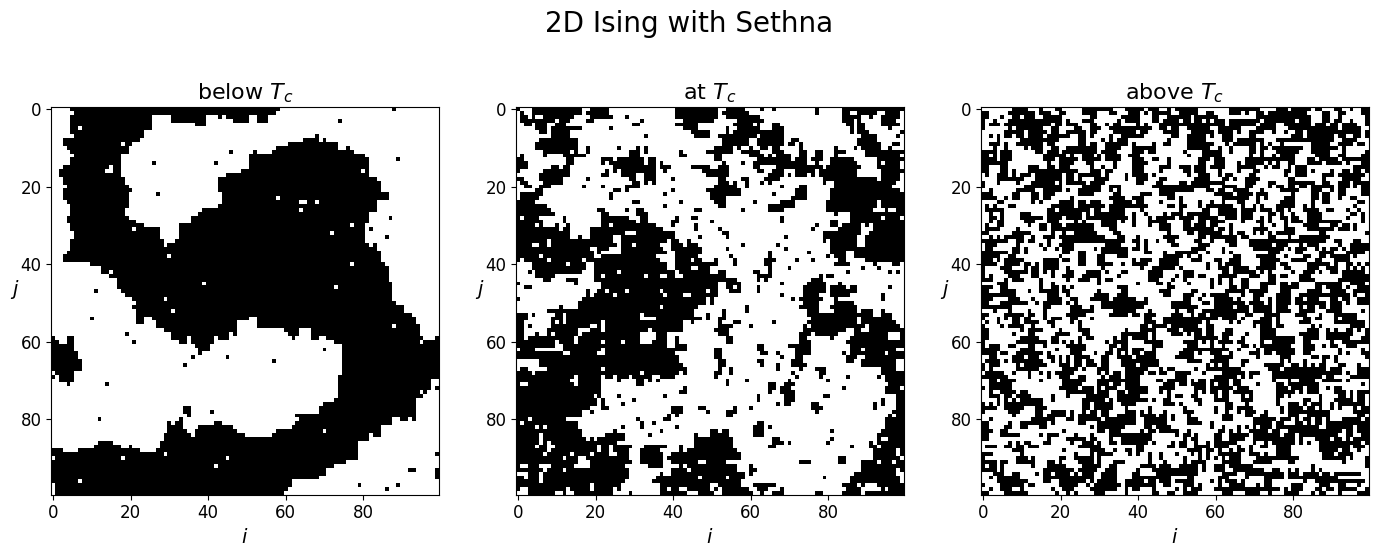

In [19]:
fig, axx = plt.subplots(1, 3, figsize=(17,6))
plt.suptitle(r'2D Ising with Sethna',fontsize=20)
heatmap = {}
for ax, ising, label in zip(axx, isings, labels):
    heatmap[label] = ax.imshow(ising.lattice,cmap='Greys')
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(r'$i$')
    ax.set_ylabel(r'$j$',rotation=0)

for _ in range(n_sweeps):
    for ax, ising, label in zip(axx, isings, labels):
        ising.SweepMetropolis(nTimes=1)
        heatmap[label].set_data(ising.lattice)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    

### Exercice 4.7
How much faster is Sethna's implementation with respect to ours? Use the cell magic `%%timeit` to measure how long a command takes to execute.

To do a fair comparison, remember to take into account what "one update" means for each case.

In [27]:
%%timeit
config=create_initial_config(100)
for t in range(10000):
	metropolis_single_update(config=config,T=T_c)

97.1 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
ising_try = IsingModel(N=100, T=T_c)
ising_try.SweepMetropolis(nTimes=1)

27.7 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit
ising_try = IsingModel(N=100,T=T_c)
ising_try.SweepWolff(nTimes=1)

27.2 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### **Risposta**
Come mostrano gli output delle celle $35,36,37$, a parità di numero di steps, l'algoritmo di *Sethna* è più veloce del semplice Metropolis. La cella $37$ mostra la sottile differenza che c'è tra `.SweepWolff()` e `SweepMetropolis()`.

## Magnetization
We will now compute the magnetization $M$ as a function of the temperature $T$. To speed up simulations even more, we will use the Wolff algorithm, which Sethna's code already implements in the `.SweepWolff()` method.

### Exercise 4.8
For a system of size $N=100$, approximately how many sweeps of the Wolff algorithm are necessary in practice to be in equilibrium? Try starting with smaller values of $N$, and increase gradually. 

In [22]:
n_sweeps=15

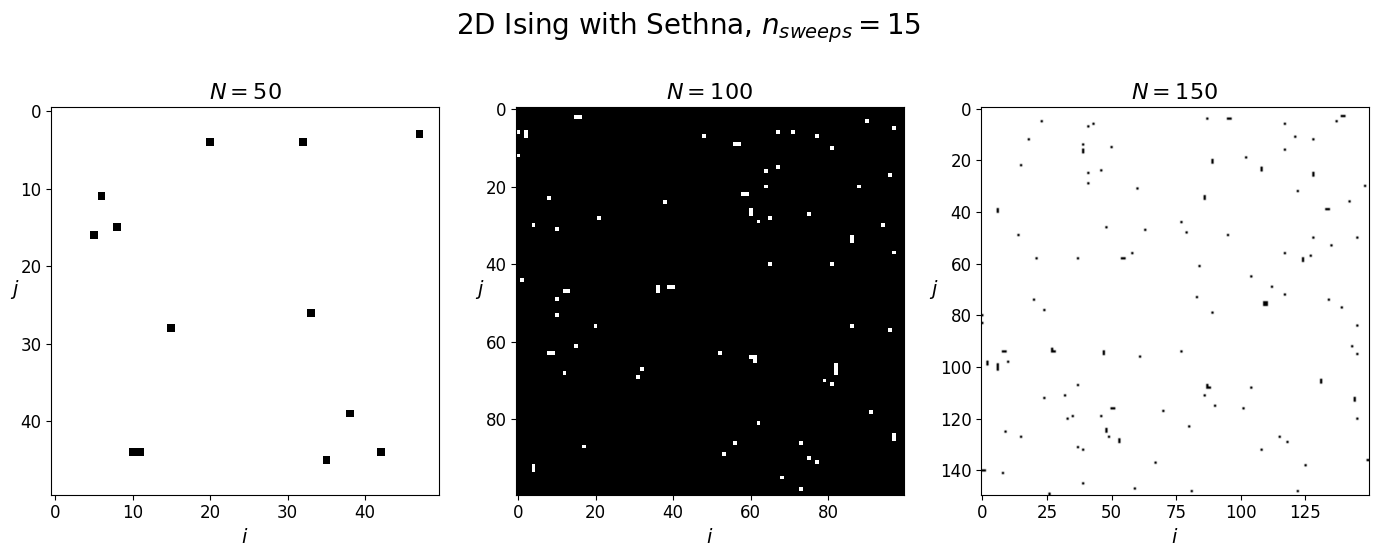

In [23]:
# set system size, temperature
sizes=[50,100,150]
T=T_below
isings_N={}
for elem in sizes:
	isings_N[str(elem)]=IsingModel(N=elem,T=T)
	
# run some Wolff sweeps, check if equilibrium
fig, axx = plt.subplots(1, 3, figsize=(17,6))
fig.suptitle(r'2D Ising with Sethna, $n_{sweeps}=$'+str(n_sweeps),fontsize=20)
heatmap = {}
Energy=np.ndarray(shape=(len(sizes),n_sweeps))
for ax, elem in zip(axx, sizes):
    heatmap[elem] = ax.imshow(isings_N[str(elem)].lattice,cmap='Greys')
    ax.set_title(r'$N=$'+str(elem), fontsize=16)
    ax.set_xlabel(r'$i$')
    ax.set_ylabel(r'$j$',rotation=0)

for i in range(n_sweeps):
    for j, ax, elem in zip(range(len(sizes)),axx, sizes):
        isings_N[str(elem)].SweepWolff(nTimes=1)
        heatmap[elem].set_data(isings_N[str(elem)].lattice)
        Energy[j,i]=get_energy(isings_N[str(elem)].lattice)
        
    display.display(plt.gcf())
    display.clear_output(wait=True)

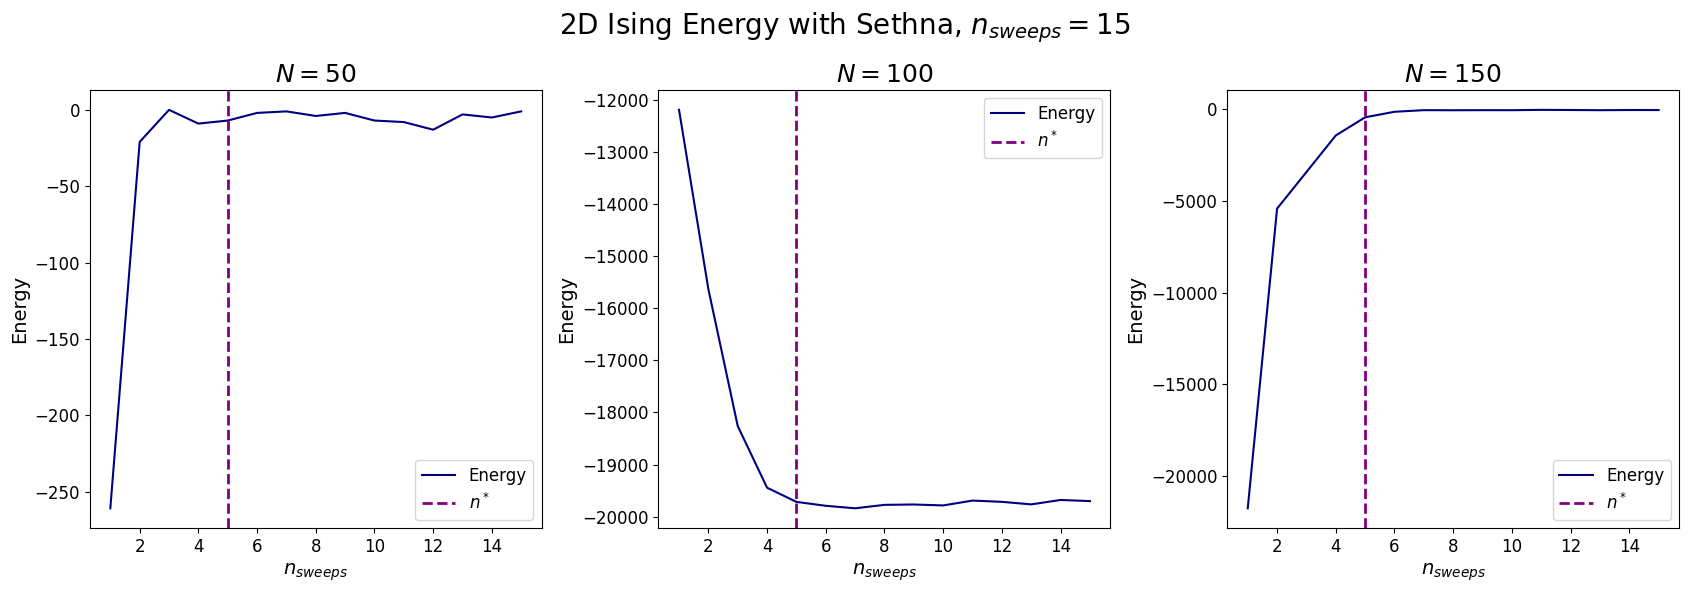

In [33]:
# run some Wolff sweeps, check if equilibrium
fig, axx = plt.subplots(1, 3, figsize=(17,6))
fig.suptitle(r'2D Ising Energy with Sethna, $n_{sweeps}=$'+str(n_sweeps),fontsize=20)
for j, ax, elem in zip(range(len(sizes)),axx, sizes):
	ax.plot(range(1,n_sweeps+1),Energy[j],color='navy',label=r'Energy')
	ax.axvline(x=5,color='purple',linewidth=2,linestyle='--',label=r'$n^*$')
	ax.set_xlabel(r'$n_{sweeps}$')
	ax.set_ylabel(r'Energy')
	ax.legend()
	ax.set_title(r'$N=$'+str(elem))

plt.tight_layout()
plt.show()

### **Risposta**
I grafici dell'energia in funzione del numero di *sweeps* mostrano che **dopo un certo $n^*$ l'energia converge ad un valore costante**. Questo significa che superato $n^*$ **il sistema ha raggiunto l'equilibrio**. Dai grafici si può dedurre che $n^*$ non dipende dalla dimensione del reticolo e che già dopo $n^*\simeq 5$ l'energia del sistema raggiunge il valore di equilibrio. Questo è confermato dalle heatmaps che mostrano una magnetizzazione circa uniforme già dopo $5$ *sweeps*.

### Exercise 4.9
Write a function that computes the magnetization of a 2D Ising system after certain equilibration period.

In [44]:
def calculate_magnetization(system_size=None, temperature=None, equilibration_time=None):
    """
    Calculate the magnetization of a 2D Ising model.
    
    Parameters
    ----------
    system_size : int
        The lattice size.
    temperature : float
        The simulation temperature.
    equilibration_time : int
        Number of Wolff sweeps before measuring M.
        
    """
    m=0
    # instantiate model
    ising=IsingModel(N=system_size,T=temperature)
    # equilibrate
    ising.SweepWolff(nTimes=equilibration_time)
    # compute magnetization
    config=ising.lattice*2-1
    m=config.sum()
    
    return m


### Exercise 4.10
+ Compute the magnetization for a system of size $N=64$, for diverent values of $T\in[1.5, 3.5]$.
+ Remember to choose wisely the equilibration time!
+ Plot $|M|$ as a function of $T$, and mark the critical temperature in your plot using the `plt.axvline()` function.

In [45]:
# define range of temperatures
temperatures = np.linspace(1.5, 3.5, num=40)
# system size
system_size = 64
# equilibration time
equilibration_time = 10

# loop over temperatures, compute magnetizations
magnetizations = []
for temperature in temperatures:
    magnetization = calculate_magnetization(system_size,temperature,equilibration_time)
    magnetizations.append(magnetization)

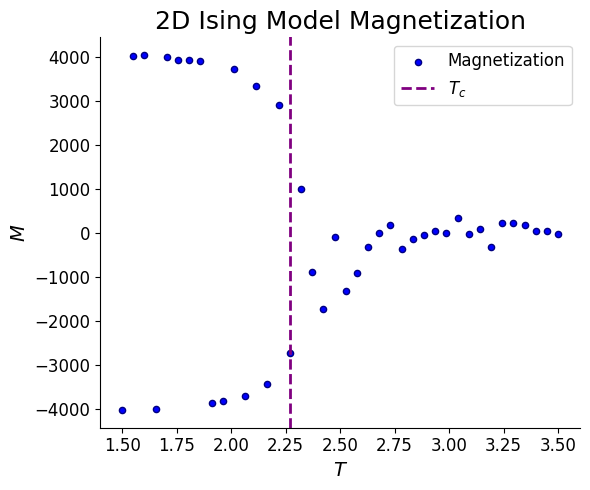

In [46]:
# define critical temperature
T_c = 2/np.log(1+np.sqrt(2))

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.scatter(x=temperatures, y=np.array(magnetizations),edgecolors='navy', color='blue', s=20,label=r'Magnetization')
ax.axvline(x=T_c,ymin=0,ymax=4200,c='purple', lw=2, ls='--',label=r'$T_c$')
ax.set_title(r'2D Ising Model Magnetization')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$M$')
ax.legend()
plt.tight_layout()
plt.show()

## Susceptibility and Specific Heat


In this exercice, we will compute the susceptibility $\chi$ and the specific heat $C$. Using formula (6.13) in the book, we have that
$$
C = \frac{1}{T^2} \left\langle (E - \langle E \rangle)^2 \right\rangle.
$$
Remember that this is only valid in **equilibrium**, which means that we can only measure energy fluctuations **after a transient** equilibration time.

### Exercise 4.11
Find a convenient formula to measure the susceptibility $\chi$ in a simulation.

$$\chi=\beta\big(\langle M^2\rangle-\langle M\rangle^2\big)\overset{K_B=1}{=}\frac{1}{T}\big(\langle M^2\rangle-\langle M\rangle^2\big)$$

### Exercise 4.12
Write a function that computes the energy of an Ising configuration.

As usually, you can use the **template** below if it helps you, or if you prefer you can also write **your own function** from scratch.

In [37]:
def compute_energy(ising):
    """Compute the energy of an ising object."""
    config = ising.lattice*2-1
    N = len(config)
    
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j, i, pbc(j+1,N))
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, pbc(i+1,N), j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= _J*config[i1,j1]*config[i2,j2]
    
    return E / N**2

### Exercise 4.13
Write a function that computes the susceptibility and the specific heat of a 2D Ising system. You might use the Wolff algorithm to speed up your simulations.

In [58]:
def calculate_susceptibility_specific_heat(system_size=None, temperature=None, equilibration_time=None, n_samples=None):
    """
    Simulate a 2D Ising model and measure its
    specific heat and susceptibility at equilibrium.
    
    Parameters
    ----------
    system_size : int
        The lattice side length.
    temperature :  float.
        The simulation temeperature.
    equilibration_time : int
        A transient period to allow for thermalization.
    n_samples : int
        The number of samples taken to compute fluctuations.

    """
    # instantiate model
    ising=IsingModel(N=system_size,T=temperature,seed=None)
    # equilibrate
    ising.SweepWolff(nTimes=equilibration_time)
    
    # create empty lists for magnetizations, energies, and their squares
    ms = []
    m2s = []
    es = []
    e2s = []
    
    # loop over n_samples 
    for _ in range(n_samples):
        # change from 0,1 to -1,1 notation
        config=ising.lattice*2-1
        # get magnetization
        m=config.sum()/(system_size**2)
        ms.append(m)
        m2s.append(m**2)
        # get energy
        e=compute_energy(ising)
        es.append(e)
        e2s.append(e**2)
        # update system
        # instantiate model
        ising=IsingModel(N=system_size,T=temperature,seed=None)
		# equilibrate
        ising.SweepWolff(nTimes=equilibration_time)
    
    # compute susceptibility and specific heat
    susceptibility = ((np.array(m2s).sum())/n_samples-((np.array(ms).sum())/n_samples)**2)/temperature
    specific_heat = ((np.array(e2s).sum())/n_samples-((np.array(es).sum())/n_samples)**2)/temperature
    
    return susceptibility, specific_heat



### Exercise 4.14
+ Compute $C$ and $\chi$ at different temperatures, for a small system of size $N<50$. You will need to find what are the right equilibration times. A good range of temperatures is $T \in [1.5, 3.5]$.
+ Make two plots, showing $\chi$ and $C$ as a function of $T$. Mark the critical temperature $T_c$ with a vertical line using `ax.axvline(...)`.

In [62]:
# define range of temperatures: 50 points from 1.5 to 4.
temperatures = np.linspace(1.5,4,num=50)
# system size
system_size = 32
# equilibration time
equilibration_time = 10
# n_samples
n_samples = 100

suscepts=[]
heats=[]

# loop over temperatures, compute susceptibility and specific_heat
for temp in temperatures:
    appo=calculate_susceptibility_specific_heat(system_size,temp,equilibration_time,n_samples)
    suscepts.append(appo[0])
    heats.append(appo[1])


In [63]:
print(suscepts,heats)

[0.6492031311035157, 0.6173747330665589, 0.5899071619313234, 0.5633422751485565, 0.5461617982556006, 0.5230524843792582, 0.5032962958729199, 0.48353323927659253, 0.4526588802684437, 0.4332403317451477, 0.4138590097185319, 0.3877018272286594, 0.36011618370387866, 0.3270327087834196, 0.2711345007373441, 0.23198352813377038, 0.1777757974733865, 0.11970503689996127, 0.07543491853158685, 0.049588445691825925, 0.035092113328076574, 0.02467807201809354, 0.010256685677020002, 0.012715781653018397, 0.008285264361663705, 0.0070159399902119364, 0.008331143141653565, 0.005852384361645853, 0.005165248963891006, 0.0024333210879809233, 0.0034753098510331175, 0.003908223262054241, 0.003395721544893246, 0.0027502263778295274, 0.0022459874294533714, 0.002071925752059273, 0.002324351235485952, 0.0016039151019360647, 0.0020966220459527713, 0.0019177627541168392, 0.001391722014589337, 0.0016142786632884632, 0.0014739926356895298, 0.0013706614120230492, 0.0010968450894472711, 0.0010195888068086358, 0.001152

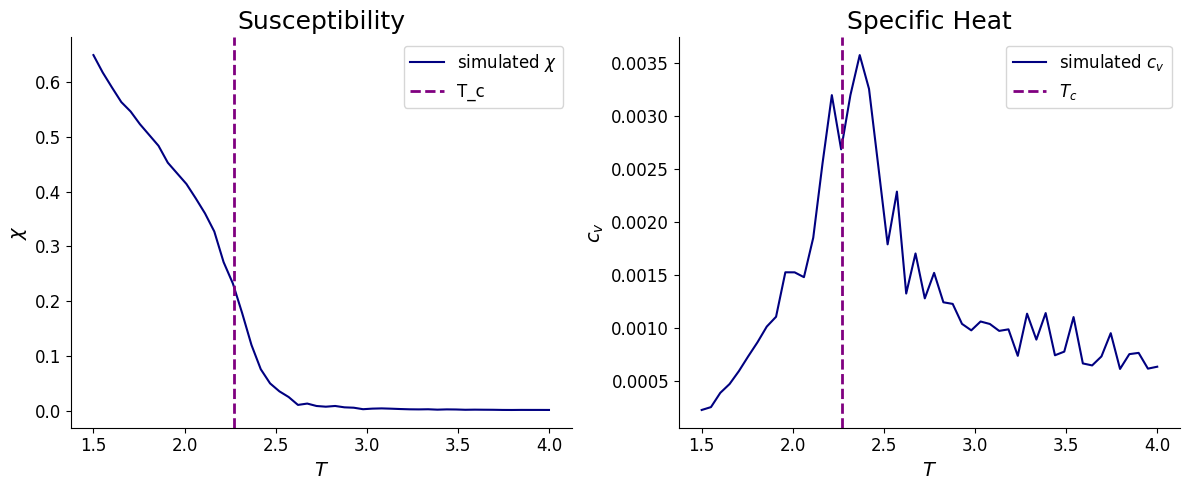

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax=ax1
ax.plot(temperatures,suscepts,color='navy',label=r'simulated $\chi$')
ax.axvline(x=T_c,color='purple',lw=2,ls='--',label=r'T_c')
ax.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$T$')
ax.set_title(r'Susceptibility')
ax.legend()

ax=ax2
ax.plot(temperatures,heats,color='navy',label=r'simulated $c_v$')
ax.axvline(x=T_c,color='purple',lw=2,ls='--',label=r'$T_c$')
ax.set_ylabel(r'$c_v$')
ax.set_xlabel(r'$T$')
ax.set_title(r'Specific Heat')
ax.legend()

plt.tight_layout()
plt.show()


### Exercise 4.15
Discuss whether or not your results proof the existence of a phase transition.

### **Risposta**
Come si può notare dal secondo grafico, il calore specifico cresce al sua valore massimo alla temperatura $T\simeq T_c$ e dopo decresce nuovamente. Questo significa che in presenza di $T_c$ si ha la massima risposta del sistema in termini di variazione di energia interna. Questo corrisponde ad una transizione di fase.

# Finding clusters
Given an Ising configuration, we define a cluster of spins as a set of neighbouring spins of the same sign surrounded by spins of the opposite sign.

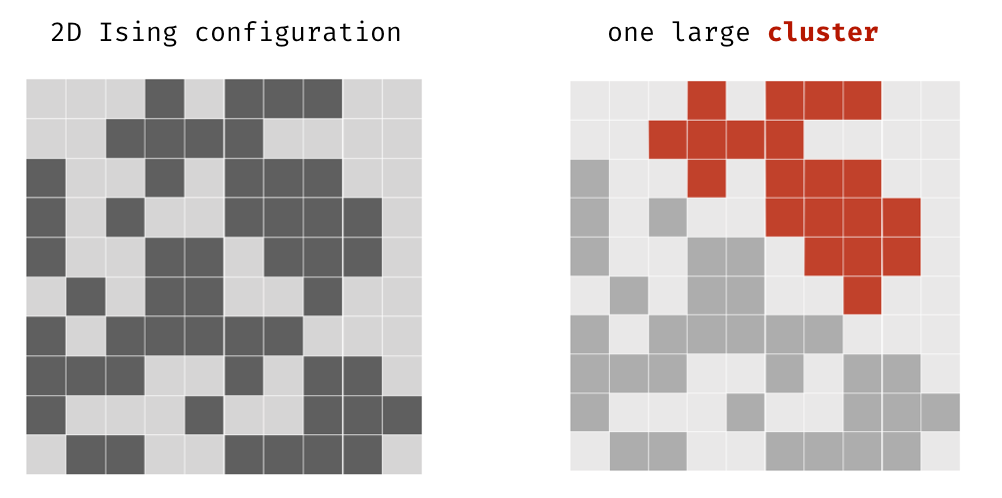

### Exercise 4.16
The formal definition of cluster is very clear, but in practice, how do you find (*efficiently* if possible) all clusters for a given configuration? We need to assign a **unique cluster label** to each spin. The cluster label could be anything (a color, a letter, a number...), it just needs to be the same for all spins that belong to the same cluster. For simplicity, we will use integers.

Think about an algorithm that assigns unique cluster labels to spins. Explain your algorithm in simple words / steps / pseudocode.

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!

### **Risposta**
L'algoritmo che ho sviluppato è basato sull'algoritmo **DFS (Depth-First Search)**. L'algoritmo funziona in questo modo:
* Fase 1, preparazione:
	* Viene inizializzata una matrice, `cluster`, $N\times N$ che conterrà i labels dei cluster per ogni sito. Questa matrice viene inizializzata a $-1$, così che il contatore dei labels parta da 0.
	* Viene definita una variabile per contare i labels, `label`, inizializzata a $0$.
* Fase 2, scansione del reticolo:
	* Per ogni sito $(i,j)$ attivo, il cui label non è stato ancora assegnato (è ancora $-1$), viene eseguito l'algoritmo **DFS** e, in seguito, si incrementa il label.
	* Algoritmo **DFS**:
		* Si crea uno stack e si aggiunge il sito $(i,j)$.
		* Finché lo stack non è vuoto, si estrae un sito $(x,y)$ dallo stack.
		* Se il sito non è stato ancora visitato si assegna il label al sito.
		* Si controllano i vicini (up, down, right, left).
		* Se il vicino non ha ancora un label ed ha lo stesso spin del sito $(x,y)$ lo si aggiunge allo stack.

### Exercise 4.17
Write a function that, given a configuration array `config`, returns another array `labels` where each cluster has a different label.

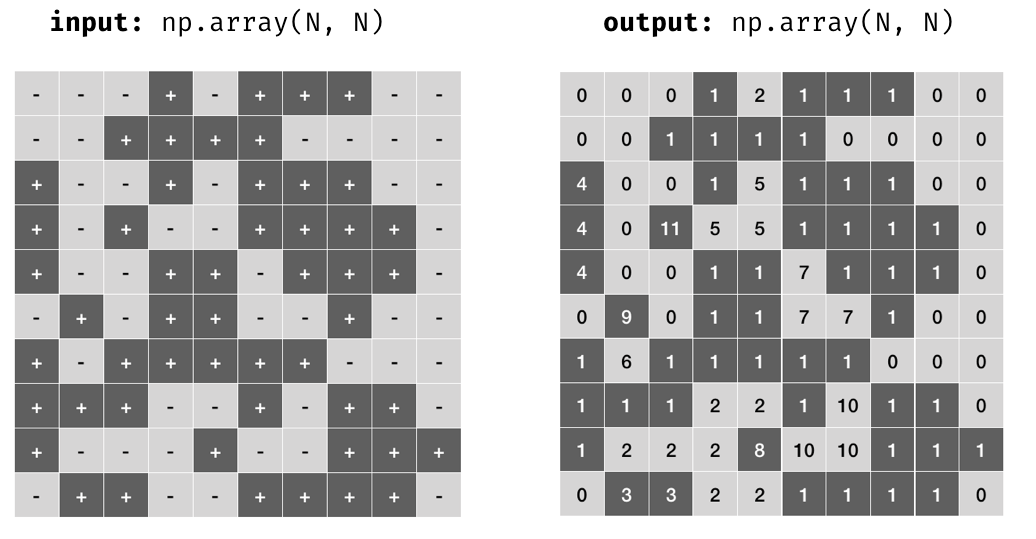

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!


In [45]:
def get_labels(spins):
    N = spins.shape[0]
    cluster = np.full_like(spins, -1, dtype=int)  # Cluster inizializzati a -1
    label = 0  # Prima etichetta del cluster

    def dfs(x, y):
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            if cluster[cx, cy] == -1:  # Non ancora visitato
                cluster[cx, cy] = label
                # Controlla i vicini
                for nx, ny in [(pbc(cx - 1, N), cy), (pbc(cx + 1,N), cy), (cx, pbc(cy - 1,N)), (cx, pbc(cy + 1,N))]:
                    if spins[nx, ny] == spins[x, y] and cluster[nx, ny] == -1:
                        stack.append((nx, ny))

    for i in range(N):
        for j in range(N):
            if spins[i, j] != 0 and cluster[i, j] == -1:  # Nuovo cluster trovato
                dfs(i, j)
                label += 1

    return cluster

### Test your function
To help you **test** your function, I have prepared some test data, so that we can all try our algorithms using the same input.

In [56]:
config_test_0 = np.array([[ 1,  1,  1],
                          [-1, -1,  1],
                          [-1, -1,  1]])

test_0=get_labels(config_test_0)
print(test_0)

[[0 0 0]
 [1 1 0]
 [1 1 0]]


In [57]:
config_test_1 = np.array([[ 1, -1, -1,  1, -1,  1],
                          [-1, -1, -1,  1, -1,  1],
                          [-1,  1, -1, -1, -1,  1],
                          [-1,  1, -1,  1,  1,  1],
                          [-1,  1, -1, -1,  1, -1],
                          [-1, -1, -1,  1,  1,  1]])
test_1=get_labels(config_test_1)
print(test_1)

[[0 1 1 0 1 0]
 [1 1 1 0 1 0]
 [1 2 1 1 1 0]
 [1 2 1 0 0 0]
 [1 2 1 1 0 1]
 [1 1 1 0 0 0]]


In [58]:
config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])

test_2=get_labels(config_test_2)
print(test_2)


[[ 0  1  2  2  1  0  3  0  0  0]
 [ 1  1  1  2  2  3  3  3  0  1]
 [ 4  1  5  3  3  3  6  6  7  4]
 [ 4  1  5  5  5  3  6  8  0  9]
 [ 1  1  5  5 10 11 12  0  0  0]
 [ 0  1  1  1 13 14  0  0 15  0]
 [ 1 16  1 13 13 14 14 14  0  0]
 [ 1  1  1  1 13 13 14 14 14  0]
 [ 0  0  1  1 13 17  0  0  0  0]
 [ 0  0  1  1  1  0  0  0  0 18]]


Execute the following cell to make sure your function works correctly. The left column will show the test configurations, and the right column will show the clusters your function found, with different clusters colored in different colors

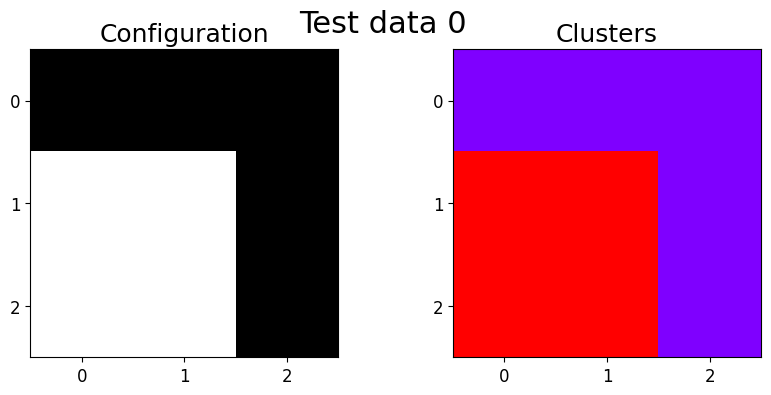

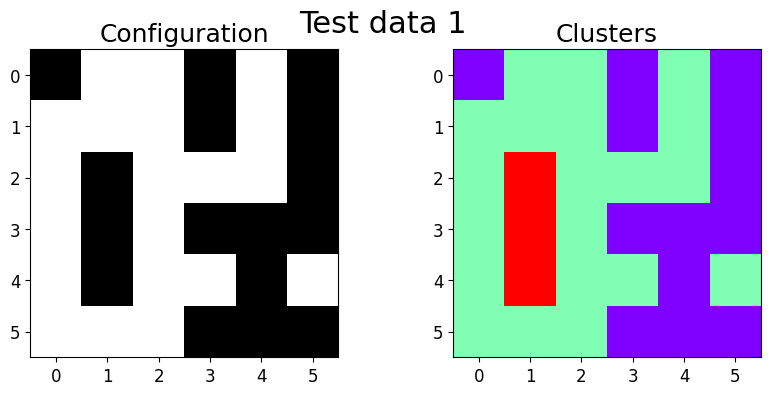

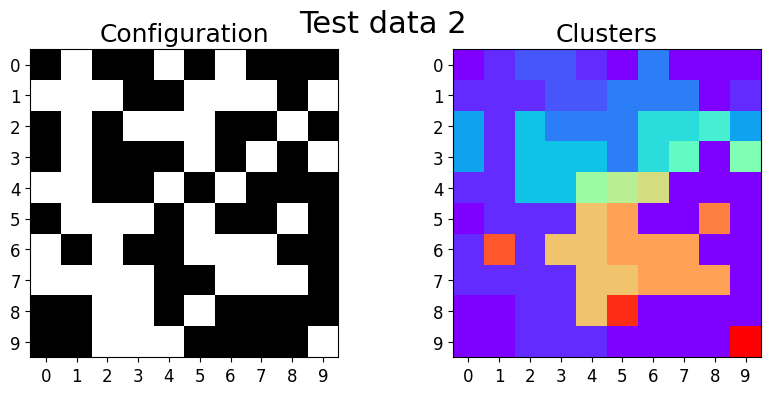

In [59]:
for i, config in enumerate([config_test_0, config_test_1, config_test_2]):
    labels = get_labels(config)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.set_xticks(range(len(config)))
    ax1.set_yticks(range(len(config)))
    ax2.set_xticks(range(len(config)))
    ax2.set_yticks(range(len(config)))
    ax1.set_title("Configuration")
    ax2.set_title("Clusters")
    ax1.imshow(config, cmap="Greys")
    ax2.imshow(labels, cmap="rainbow")
    
    fig.suptitle(f"Test data {i}", fontsize=22)

If your function doesn't work, you might want to use this cell to inspect your results

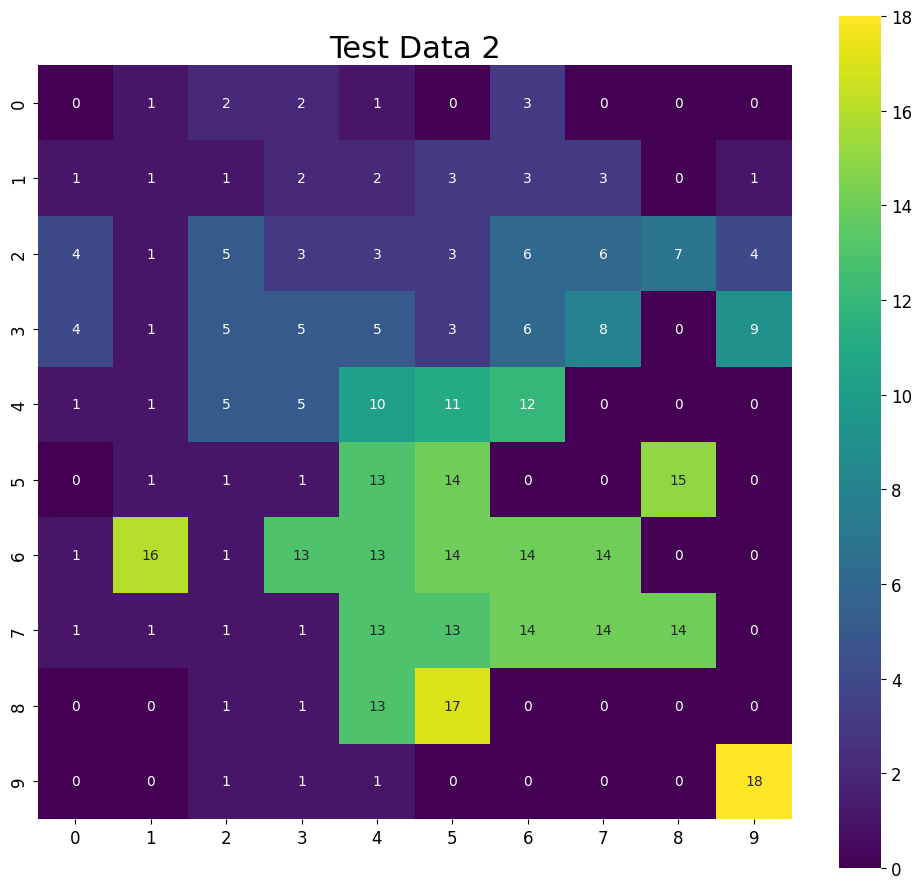

In [60]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_aspect(1)
sns.heatmap(labels, annot=True, ax=ax, cmap="viridis")
plt.title(r'Test Data 2',fontsize=22)
plt.tight_layout()
plt.show()

### Measuring cluster sizes
Use your `get_labels()` function to find clusters in a large Ising model, say $N=500$. You can use your own Ising implementation. If you use Sethna's code, remember that he uses $s \in \{0, 1\}$ spins!

In [168]:
ising=IsingModel(N=500)
new_config=ising.lattice*2-1
n_labels = get_labels(new_config)

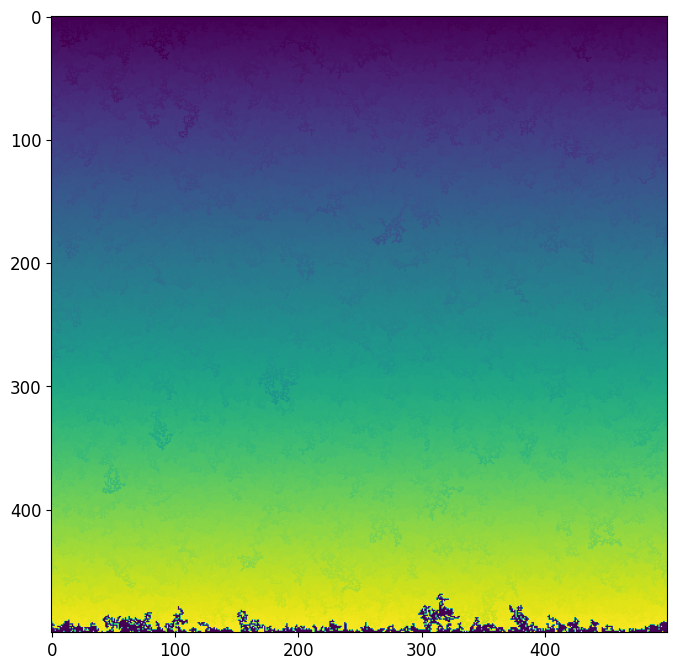

In [170]:
plt.figure(figsize=(10, 8))
plt.imshow(n_labels,cmap='viridis')

### Exercise 4.18
Find an efficient way to measure cluster sizes. Remind that all you care about is the distribution of cluster sizes, their location does not matter. You might want to use the `.reshape()` method of a numpy array, and the `Counter` class from the `collections` package.

In [62]:
from collections import Counter

In [64]:
def get_sizes(labels):
    #Use Hoshen-Kopelman algorithm
    N, M = labels.shape
    assert (N==M)
    new_labels = np.reshape(labels, N*N)
    size = max(new_labels) + 1
    count = Counter(new_labels)
    sizes = np.zeros(size)
    for i in range(size): 
        sizes[i] = count[i]
    return sizes

### Exercise 4.19
For $T >> T_c$, spins are essentially uncorrelated. What is the distribution of cluster sizes you expect to find in this case? **Hint** Think about the 1D case assuming totally uncorrelated spins.

### **Risposta**
La scorrelazione tra spin indica che gli spin non interagiscono, quindi sono indipendenti. Questo è dovuto all'alta temperatura del sistema che alza la probabilità di avere due spin antiparalleli. Ci si aspetta quindi che il numero di piccoli cluster sia molto maggiore rispetto a quello di grandi cluster. Infatti nella distribuzione della taglia dei cluster ci si aspetta una cosa esponenziale.

### Exercice 4.20
Do a simulation at very high temperature and measure the cluster size distribution. Plot your results in log-log scale. Do your results agree with your previous answer?

### **Risposta**
I risultati sono in accordo con quanto ipotizzato precedentemente. Infatti dopo circa una taglia di dimensione di cluster pari a 100 circa, il numero di cluster con tale taglia è quasi nullo.

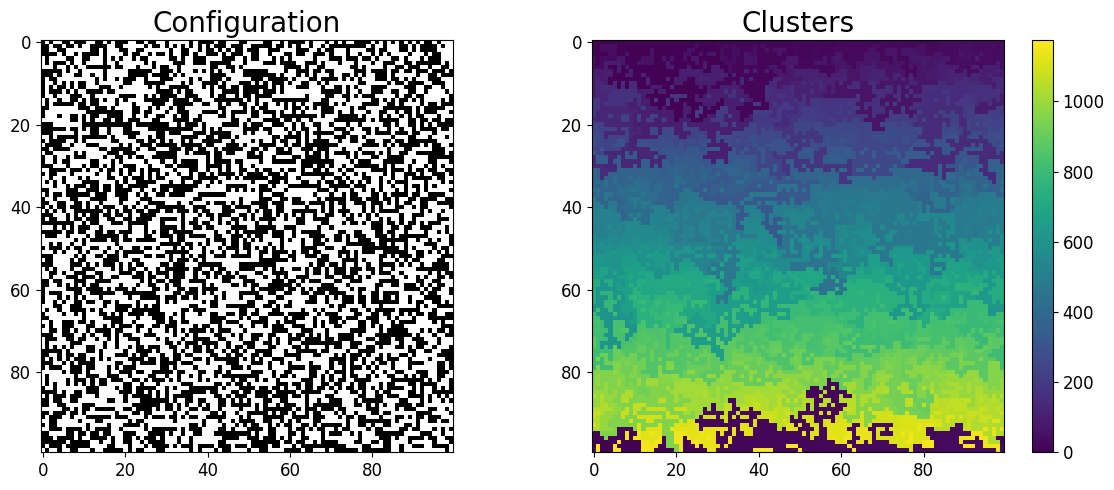

In [179]:
N=100
T_c = 2/np.log(1+np.sqrt(2))
ising = IsingModel(N=N, T=20*T_c)
ising.SweepWolff(nTimes=10)
config = ising.lattice*2-1
labels = get_labels(config)
sizes = get_sizes(labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.set_title("Configuration",fontsize=20)
ax2.set_title("Clusters",fontsize=20)
ax1.imshow(config, cmap="Greys")
im2=ax2.imshow(labels, cmap="viridis")
fig.colorbar(im2, ax=ax2, orientation='vertical')

plt.tight_layout()
plt.show()

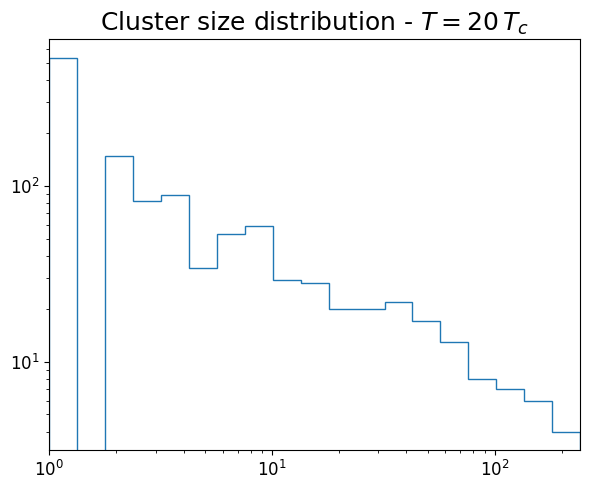

In [172]:
# use logarithmic bins and logarithmic axes!
bins = np.geomspace(min(sizes), max(sizes), num=20)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.hist(sizes, bins=bins, histtype="step")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))
ax.set_title(r'Cluster size distribution - $T=20\,T_c$')

plt.tight_layout()
plt.show()

### Exercise 4.21

At $T_c$, the distribution of cluster sizes is known to be a power law with exponent close to $\alpha \simeq 2$.

$$
P(s) \propto s^{-\alpha}
$$

Do a simulation at $T=T_c$ and compare the resulting cluster size distribution with that obtained at $T>>T_c$.

In [173]:
# do simulation
N=100

ising_h = IsingModel(N=N, T=T_c)
ising_h.SweepWolff(nTimes=10)
config_h = ising_h.lattice*2-1
labels_h = get_labels(config_h)
sizes_h = get_sizes(labels_h)

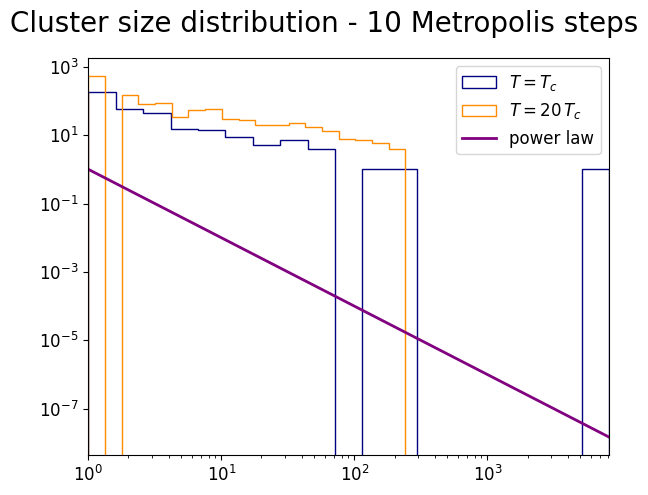

In [174]:
# plot results
# use logarithmic bins and logarithmic axes!
bins_h = np.geomspace(min(sizes_h), max(sizes_h), num=20)
bins = np.geomspace(min(sizes), max(sizes), num=20)
x = np.geomspace(min(sizes_h), max(sizes_h), num=100)
p=1/(x**2)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.hist(sizes_h, bins=bins_h, histtype="step",color='navy',label=r'$T=T_c$')
ax.hist(sizes, bins=bins, histtype="step",color='darkorange',label=r'$T=20\,T_c$')
ax.plot(x,p, color='purple', lw=2,label=r'power law')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes_h), max(sizes_h))
ax.legend()

plt.suptitle(r'Cluster size distribution - 10 Metropolis steps',fontsize=20)
plt.tight_layout()
plt.show()